Import Necessary Libraries

In [91]:
import pandas as pd
import os
from os.path import isfile, join

#Task 1 
Merge the 12 months of sales data in a single file 

In [92]:
files = [f for f in os.listdir("./Sales_Data") if isfile(join("./Sales_Data",f)) & f.endswith(".csv")]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [93]:
filePaths = [join("Sales_Data",f) for f in files ] 
filePaths

['Sales_Data\\Sales_April_2019.csv',
 'Sales_Data\\Sales_August_2019.csv',
 'Sales_Data\\Sales_December_2019.csv',
 'Sales_Data\\Sales_February_2019.csv',
 'Sales_Data\\Sales_January_2019.csv',
 'Sales_Data\\Sales_July_2019.csv',
 'Sales_Data\\Sales_June_2019.csv',
 'Sales_Data\\Sales_March_2019.csv',
 'Sales_Data\\Sales_May_2019.csv',
 'Sales_Data\\Sales_November_2019.csv',
 'Sales_Data\\Sales_October_2019.csv',
 'Sales_Data\\Sales_September_2019.csv']

In [94]:
Sales_total = pd.DataFrame()
Sales_total = pd.concat([pd.read_csv(f) for f in filePaths ], ignore_index=True)
Sales_total.to_csv("All_Sales",index=False)

Read updated data 

In [95]:
Sales_total = pd.read_csv("All_Sales")
Sales_total

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Cleaning the data

In [96]:
nan_count_per_column = Sales_total.isna().sum()
print(nan_count_per_column)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [97]:
Sales_total = Sales_total.dropna( how='all')

In [98]:
nan_count_per_column = Sales_total.isna().sum()
print(nan_count_per_column)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [99]:
Sales_total["Quantity Ordered"] = pd.to_numeric(Sales_total["Quantity Ordered"], errors='coerce')
Sales_total["Price Each"] = pd.to_numeric(Sales_total["Price Each"], errors='coerce')

C:\Users\Informatics\AppData\Local\Temp\ipykernel_4052\2061589969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sales_total["Quantity Ordered"] = pd.to_numeric(Sales_total["Quantity Ordered"], errors='coerce')
C:\Users\Informatics\AppData\Local\Temp\ipykernel_4052\2061589969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sales_total["Price Each"] = pd.to_numeric(Sales_total["Price Each"], errors='coerce')


In [100]:
Sales_total = Sales_total[Sales_total["Order Date"].str[:2] != "Or"]
Sales_total

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Task 2

In [101]:
Sales_total["Month"] = Sales_total["Order Date"].str[:2]
Sales_total["Total"] = Sales_total["Quantity Ordered"] * Sales_total["Price Each"]
Sales_total

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99


In [102]:
Month_Sale = Sales_total[["Month", "Total"]].groupby("Month").sum()
print(Month_Sale)


            Total
Month            
01     1822256.73
02     2202022.42
03     2807100.38
04     3390670.24
05     3152606.75
06     2577802.26
07     2647775.76
08     2244467.88
09     2097560.13
10     3736726.88
11     3199603.20
12     4613443.34


In [103]:
Best_Sales_month = Month_Sale["Total"].idxmax()
Best_Sales = Month_Sale["Total"].max()

print(Best_Sales_month)
print(Best_Sales)


12
4613443.34


Text(0, 0.5, 'Sales in USD')

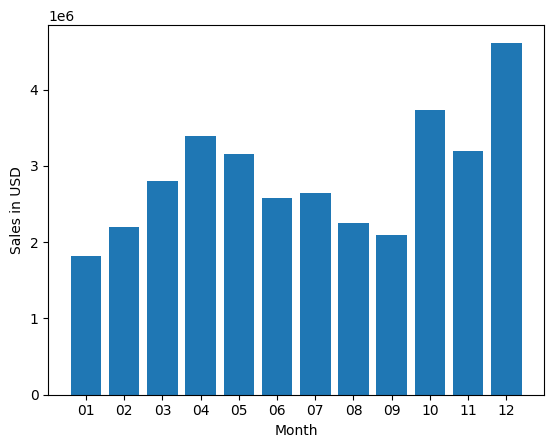

In [104]:
import matplotlib.pyplot as plt
plt.bar(Month_Sale.index, Month_Sale.Total)
plt.xlabel("Month")
plt.ylabel("Sales in USD")

In [105]:
Sales_total["City"] = Sales_total["Purchase Address"].str.split(",").str[1] + " " + Sales_total["Purchase Address"].str.split(",").str[2].str[:3]
Sales_total

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles CA
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco CA
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco CA


In [106]:
City_Sales = Sales_total[["City","Total"]].groupby("City").sum()
City_Sales

,Total
City,
Atlanta GA,2795498.58
Austin TX,1819581.75
Boston MA,3661642.01
Dallas TX,2767975.40
Los Angeles CA,5452570.80
New York City NY,4664317.43
Portland ME,449758.27
Portland OR,1870732.34
San Francisco CA,8262203.91


In [107]:
Best_Sales_percity = City_Sales.Total.max()
Best_Sales_index = City_Sales.Total.idxmax()
print(Best_Sales_index)
print(Best_Sales_percity)

 San Francisco  CA
8262203.91


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ' Atlanta  GA'),
  Text(1, 0, ' Austin  TX'),
  Text(2, 0, ' Boston  MA'),
  Text(3, 0, ' Dallas  TX'),
  Text(4, 0, ' Los Angeles  CA'),
  Text(5, 0, ' New York City  NY'),
  Text(6, 0, ' Portland  ME'),
  Text(7, 0, ' Portland  OR'),
  Text(8, 0, ' San Francisco  CA'),
  Text(9, 0, ' Seattle  WA')])

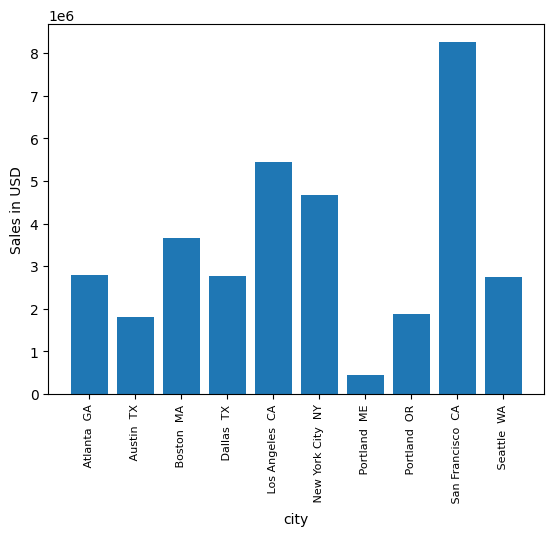

In [108]:
plt.bar(City_Sales.index,City_Sales["Total"])
plt.xlabel("city")
plt.ylabel("Sales in USD")
plt.xticks( rotation = "vertical", size = 8)

TASK 3

In [109]:
Sales_total["Order Date"] = pd.to_datetime(Sales_total["Order Date"], format='%m/%d/%y %H:%M')

In [110]:
def getTime(x):
   return x.hour

Sales_total["Hour"] = Sales_total["Order Date"].apply(lambda x: getTime(x))

In [111]:
Sales_total

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles CA,20
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco CA,16
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco CA,7
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco CA,17


In [112]:
hourly_Sales = Sales_total.groupby("Hour").count()

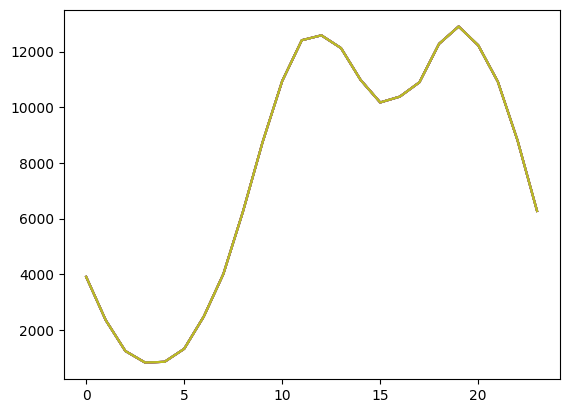

In [ ]:
plt.plot(hourly_Sales.index,Sales_total.groupby("Hour").count())
plt.xlabel("Hour")
plt.ylabel("Commands")
plt.xticks(range(0,24))